In [1]:
#defined all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#collecting the data
data=pd.read_csv('Position_Salaries.csv')

In [3]:
#to show the data
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


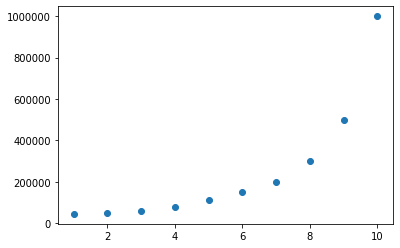

In [4]:
#plotting the values in graph to check whether it is linear or not
plt.scatter(data.Level, data.Salary)

In [5]:
#taking the input values
X=data.iloc[:,1:2].values
X.shape

(10, 1)

In [6]:
#taking the output values
y=data.iloc[:,-1].values
y.shape

(10,)

In [7]:
#importing train_test_split function for training and testing
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [9]:
#check the shape of the training input
X_train.shape

(7, 1)

In [10]:
#check the shape of the training output
y_train.shape

(7,)

# Linear Regression

In [11]:
#first import the Linear Regression to check how it performs
from sklearn.linear_model import LinearRegression

In [12]:
regression=LinearRegression()

In [13]:
#fitting the training inputs and outputs
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#predict the value
y_pred=regression.predict(X_test)

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
#calculating the r2 score
r2_score(y_test,y_pred)

0.8001297404169496

In [17]:
#calculating the root mean square value
np.sqrt(mean_squared_error(y_test,y_pred))

89189.88917699925

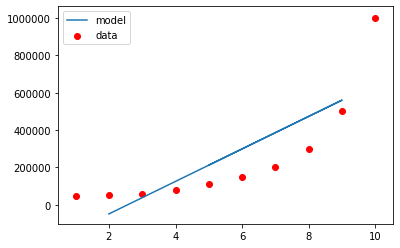

In [18]:
#plotting the graph to see how much it fits with the points of the dataset
plt.plot(X_test,y_pred, label="model")
plt.scatter(X,y,label="data", color="red")
plt.legend()
plt.show()

# Polynomial Regression

In [19]:
#to use polynomial regression we import this model
from sklearn.preprocessing import PolynomialFeatures

In [20]:
#creating a function to get the difference between the training error and testing error


def polynomial_regression(X,y,k):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
    regression=LinearRegression()
    poly=PolynomialFeatures(degree=k)
    X_train_poly=poly.fit_transform(X_train)
    X_test_poly=poly.fit_transform(X_test)
    regression.fit(X_train_poly,y_train)
    y_pred_poly=regression.predict(X_test_poly)
    
    training_score=r2_score(y_train,regression.predict(X_train_poly))
    testing_score=r2_score(y_test,y_pred_poly)
    
    
    return training_score,testing_score

In [21]:
train=[]
test=[]

for i in range(1,10):
    r2_train, r2_test=polynomial_regression(X,y,i)
    train.append(r2_train)
    test.append(r2_test)

In [22]:
x=np.arange(9)+1

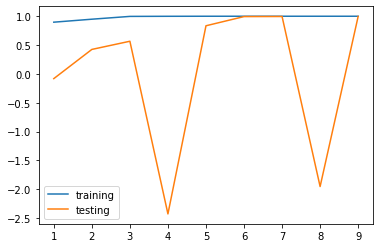

In [23]:
#plotting the points to check at which degree it will perform accurately
plt.plot(x,train,label="training")
plt.plot(x,test, label="testing")
plt.legend()
plt.show()

In [24]:
#from the graph, we have solved the degree is 5 
poly=PolynomialFeatures(degree=6)

#increase the values
X_train_poly=poly.fit_transform(X_train)


X_test_poly=poly.fit_transform(X_test)

#fitting them
regression.fit(X_train_poly,y_train)

#predict the value
y_pred_poly=regression.predict(X_test_poly)


r2_score(y_test,y_pred_poly)

0.9936812666394045

In [25]:
np.sqrt(mean_squared_error(y_test,y_pred_poly))

15858.297126479314